# Regression Error Distribution 

## Imports

In [1]:
from deepchecks.base import Dataset
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from deepchecks.checks.performance import RegressionErrorDistribution

## Generating data:

In [2]:
diabetes_df = load_diabetes(return_X_y=False, as_frame=True).frame
train_df, test_df = train_test_split(diabetes_df, test_size=0.33, random_state=42)

train = Dataset(train_df, label_name='target', cat_features=['sex'])
test = Dataset(test_df, label_name='target', cat_features=['sex'])

clf = GradientBoostingRegressor(random_state=0)
_ = clf.fit(train.features_columns, train.label_col)

## Running RegressionErrorDistribution check (normal distribution):

In [3]:
check = RegressionErrorDistribution()

Regression Error Distribution

Check regresstion error distribution.

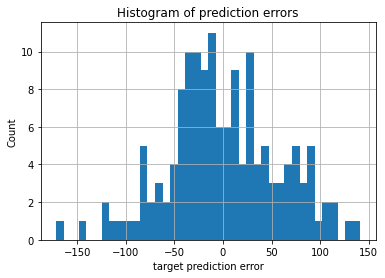

Largest over estimation errors:

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target Prediction Difference
364,0.00,0.05,-0.01,-0.02,-0.01,0.00,-0.04,0.03,0.01,0.10,262.00,141.41
9,-0.07,-0.04,0.04,-0.03,-0.01,-0.03,-0.02,-0.00,0.07,-0.01,310.00,126.37
77,-0.10,-0.04,-0.04,-0.07,-0.04,-0.03,0.02,-0.04,-0.07,-0.00,200.00,114.52


Largest under estimation errors:

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target Prediction Difference
380,0.02,-0.04,0.03,0.06,-0.06,-0.04,-0.01,-0.03,-0.05,-0.03,52.00,-171.72
56,-0.04,-0.04,0.04,-0.03,-0.03,-0.03,-0.04,0.00,0.03,-0.02,52.00,-147.97
7,0.06,0.05,-0.00,0.07,0.09,0.11,0.02,0.02,-0.04,0.00,63.00,-120.45


In [4]:
check.run(test, clf)

#Skewing the data:

In [5]:
test.data[test.label_name] = 150

## Running RegressionErrorDistribution check (abnormal distribution):

In [6]:
check = RegressionErrorDistribution()

Regression Error Distribution

Check regresstion error distribution.

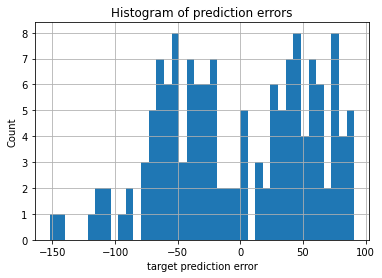

Largest over estimation errors:

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target Prediction Difference
237,0.06,-0.04,-0.07,-0.07,-0.00,-0.00,0.04,-0.04,-0.05,-0.00,150,90.93
436,-0.06,-0.04,-0.07,-0.05,-0.02,-0.05,0.09,-0.08,-0.06,-0.05,150,88.95
55,-0.04,-0.04,-0.05,-0.04,-0.01,-0.02,0.09,-0.04,-0.07,0.01,150,88.46


Largest under estimation errors:

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target Prediction Difference
114,0.02,-0.04,0.11,0.06,0.01,-0.03,-0.02,0.02,0.10,0.02,150,-152.13
332,0.03,-0.04,0.10,0.08,-0.01,-0.01,-0.06,0.03,0.06,0.04,150,-145.71
321,0.10,-0.04,0.05,0.08,0.05,0.04,-0.08,0.14,0.10,0.06,150,-119.18


In [7]:
check.run(test, clf)